<a href="https://colab.research.google.com/github/ebunsoph25/NOTEBOOK-PROJECT/blob/main/PYTHON_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM STATEMENT**

This project seeks to develop a robust machine learning pipeline to predict loan default risk, enabling better credit decisions and minimizing financial losses.

**AIM:**

To develop and evaluate a machine learning model that predicts whether a borrower will default on a loan and to translate the findings into actionable insights for credit risk management by utilizing customer behavioral and financial data.

In [170]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**UNDERSTANDING DATASET 1**

This dataset containts the performance data of the customers.

In [171]:
# Get the first dataset
url = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv'

In [172]:
df = pd.read_csv(url)


In [173]:
# preview first 5
df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [174]:
df.sample(2)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
1589,8a858e625c8d993a015c98e6bf820462,301984836,2,2017-07-19 00:15:16.000000,2017-07-18 23:15:09.000000,10000.0,11500.0,15,NaN,Good
3205,8a858f8a558227f20155915162bd53e0,302001651,6,2017-07-29 06:35:49.000000,2017-07-29 05:35:43.000000,10000.0,13000.0,30,NaN,Bad


In [175]:
df.shape

(4368, 10)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


**OBSERVATIONS FROM DF**

. Missing values were identified.

. Inappropriate data types were observed in the approveddate and creationdate columns.

. These observations guide the next steps in the data cleaning process to prepare the data for analysis and modeling.

In [177]:
# missing values
df.isna().sum().sort_values(ascending=False)

,0
referredby,3781
customerid,0
systemloanid,0
loannumber,0
creationdate,0
approveddate,0
loanamount,0
totaldue,0
termdays,0
good_bad_flag,0


In [178]:
# percentage of the missing values
df.isna().sum().sort_values(ascending=False)/len(df)*100

,0
referredby,86.561355
customerid,0.000000
systemloanid,0.000000
loannumber,0.000000
creationdate,0.000000
approveddate,0.000000
loanamount,0.000000
totaldue,0.000000
termdays,0.000000
good_bad_flag,0.000000


**Handling Missing Values**


The above shows that the referred_by column has 3781 out of 4368 rows missing, indicating an 87% missing values. This indicates that 87% were not referred by a customer and 13% were referred. It is unlikely to be a highly relevant feature for building a robust credit prediction, since it has significant incomplete columns provided. Referred_by column will be dropped.

In [179]:
# drop missing values
df.drop('referredby', axis=1, inplace=True)

#check the no of missing values after dropping
df.isna().sum()

,0
customerid,0
systemloanid,0
loannumber,0
approveddate,0
creationdate,0
loanamount,0
totaldue,0
termdays,0
good_bad_flag,0


**Correct Data Types**

In [180]:
# convert the date columns to date time
df['approveddate'] = pd.to_datetime(df['approveddate'], errors='coerce')
df['creationdate'] = pd.to_datetime(df['creationdate'], errors='coerce')

#check the data types after conversion
df.dtypes

,0
customerid,object
systemloanid,int64
loannumber,int64
approveddate,datetime64[ns]
creationdate,datetime64[ns]
loanamount,float64
totaldue,float64
termdays,int64
good_bad_flag,object


In [181]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [182]:
df['customerid'].duplicated().sum()

np.int64(0)

In [183]:
# descriptive statistics
df.describe().T

,count,mean,min,25%,50%,75%,max,std
systemloanid,4368.0,301980956.657509,301958485.0,301969128.0,301980100.0,301993503.5,302004050.0,13431.151516
loannumber,4368.0,5.17239,2.0,2.0,4.0,7.0,27.0,3.653569
approveddate,4368,2017-07-16 07:43:39.926510848,2017-07-01 01:35:26,2017-07-08 11:43:12.750000128,2017-07-16 09:48:41.500000,2017-07-24 14:27:19,2017-07-30 22:55:51,NaN
creationdate,4368,2017-07-16 06:42:02.777243392,2017-07-01 00:35:20,2017-07-08 10:43:07.750000128,2017-07-16 08:48:32,2017-07-24 13:27:12.750000128,2017-07-30 21:55:43,NaN
loanamount,4368.0,17809.065934,10000.0,10000.0,10000.0,20000.0,60000.0,10749.694571
totaldue,4368.0,21257.377679,10000.0,13000.0,13000.0,24500.0,68100.0,11943.510416
termdays,4368.0,29.261676,15.0,30.0,30.0,30.0,90.0,11.512519


**UNDERSTANDING DATASET 2**


This dataset containts the demographics data of the customers.

In [184]:
# Get the second dataset
url = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv'

In [185]:
df2 = pd.read_csv(url)

In [186]:
df2.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [187]:
df2.shape

(4346, 9)

In [188]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


**OBSERVATION FROM df2 INFO**

. Missing values were identified.

. Inappropriate data types were observed.

. These observations highlight the data quality issues in the demographics data that need to be addressed before it can be used for further analysis.


In [189]:
# missing values
df2.isna().sum().sort_values(ascending=False)

,0
bank_branch_clients,4295
level_of_education_clients,3759
employment_status_clients,648
customerid,0
birthdate,0
latitude_gps,0
longitude_gps,0
bank_account_type,0
bank_name_clients,0


In [190]:
# percentage of the missing values
df2.isna().sum().sort_values(ascending=False)/len(df)*100

,0
bank_branch_clients,98.328755
level_of_education_clients,86.057692
employment_status_clients,14.835165
customerid,0.000000
birthdate,0.000000
latitude_gps,0.000000
longitude_gps,0.000000
bank_account_type,0.000000
bank_name_clients,0.000000


### **Handling Missing Values**

 Drop bank_branch_clients: This is because column has a very high percentage of missing values (over 98%), making it unsuitable for use in the model.

 Fill missing values in the employment_status_clients and level_of_education_clients columns with the string 'Missing':  Imputing missing categorical data aids in a way that signifies the absence of information can be a useful strategy for feature engineering and visualisation.

In [191]:
# drop missing values(bank_branch clients)
df2.drop('bank_branch_clients', axis=1, inplace=True)

In [192]:
# Fill null values in specified columns with 'Missing'
df2['level_of_education_clients'] = df2['level_of_education_clients'].fillna('Missing')
df2['employment_status_clients'] = df2['employment_status_clients'].fillna('Missing')

In [193]:
# check to verify handling missing values
(df2.isna().sum())

,0
customerid,0
birthdate,0
bank_account_type,0
longitude_gps,0
latitude_gps,0
bank_name_clients,0
employment_status_clients,0
level_of_education_clients,0


**Correct Data Types**

In [194]:
# convert the date columns to date time
df2['birthdate'] = pd.to_datetime(df2['birthdate'], errors='coerce')
#check the data types after conversion
df2.dtypes

,0
customerid,object
birthdate,datetime64[ns]
bank_account_type,object
longitude_gps,float64
latitude_gps,float64
bank_name_clients,object
employment_status_clients,object
level_of_education_clients,object


**Feature Engineering on df2**

A new column 'age' will be created to calculate customer's age from birthdate, as this is a standard demographic feature used in credit risk models and will be highly relevant in our prediction.

In [195]:
from datetime import date

# Function to calculate age
def calculate_age(birthdate):
    today = date.today()
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))

# Apply the function to create a new 'age' column
df2['age'] = df2['birthdate'].apply(calculate_age)

# Display a few rows to check the new 'age' column
display(df2.head(2))

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,age
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,Missing,Missing,51
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,Permanent,Missing,39


In [196]:
# check for duplicates
df2.duplicated().sum()

np.int64(12)

In [197]:
df2['customerid'].duplicated().sum()

np.int64(12)

In [198]:
# Display duplicated customer IDs
display(df2[df2['customerid'].duplicated()])

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,age
159,8a858fca5c35df2c015c39ad8695343e,1980-11-26,Savings,3.352588,7.211089,GT Bank,Permanent,Missing,44
517,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18,Other,3.782563,7.171356,First Bank,Permanent,Secondary,37
776,8a858f965bb63a25015bbf63fd062e2e,1974-02-25,Savings,3.936366,6.817958,Stanbic IBTC,Permanent,Missing,51
1015,8a858fe65675195a015679452588279c,1982-08-01,Savings,7.533646,9.046885,UBA,Permanent,Missing,43
1090,8a858e6c5c88d145015c8b9627cd5a48,1979-09-30,Savings,3.367008,6.497313,Sterling Bank,Permanent,Missing,45
1188,8a858fc75cd62882015cdaf2f4311b3f,1975-10-27,Savings,7.437607,9.088935,GT Bank,Permanent,Missing,49
1480,8a858fe05d421ff4015d4c87d2a21ceb,1983-01-20,Savings,8.526960,12.023015,Skye Bank,Permanent,Missing,42
1928,8a858e625c8d993a015c938f829f77ee,1988-12-20,Savings,5.768333,5.561992,First Bank,Permanent,Missing,36
1996,8a858ec65cc6352b015cc64525ea0763,1985-01-30,Savings,3.845728,7.411737,GT Bank,Permanent,Missing,40
4126,8a858f1e5baffcc9015bb02b505f180d,1983-04-06,Savings,6.969350,4.818535,GT Bank,Permanent,Missing,42


**Dropping Duplicates Rows in df2**

Duplicate rows from the demographics dataset (df2) will be dropped to ensure each row represents a unique combination of demographic attributes.

In [199]:
# Drop duplicate rows based on 'customerid', keeping the first occurrence
df2.drop_duplicates(subset=['customerid'], keep='first', inplace=True)

# check duplicates have been dropped
display(df2.duplicated().sum())

np.int64(0)

In [200]:
# descriptive statistics
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
birthdate,4334,1984-07-23 23:34:44.910013824,1961-10-13 00:00:00,1980-11-28 06:00:00,1985-04-16 00:00:00,1988-12-24 00:00:00,1996-03-28 00:00:00,NaN
longitude_gps,4334.0,4.624,-118.247009,3.354857,3.591668,6.543691,151.20929,7.194031
latitude_gps,4334.0,7.249975,-33.868818,6.47061,6.62173,7.425021,71.228069,3.056594
age,4334.0,40.622981,29.0,36.0,40.0,44.0,63.0,6.151633


**UNDERSTANDING DATASET 3**

This dataset containts the previous loan data of the customers.

In [201]:
# Get the third dataset
url = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv'

In [202]:
df3 = pd.read_csv(url)

In [203]:
df3.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [204]:
df3.shape

(18183, 12)

In [205]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


**OBSERVATION FROM df3 INFO**

. Missing values were identified.

.Inappropriate data types were observed in several date columns.

. These observations guide the data cleaning process for the previous loan data, which is crucial for accurate feature engineering.

In [206]:
# missing values
df3.isna().sum().sort_values(ascending=False)

,0
referredby,17157
customerid,0
loannumber,0
systemloanid,0
approveddate,0
creationdate,0
totaldue,0
loanamount,0
termdays,0
closeddate,0


In [207]:
# percentage of the missing values
df3.isna().sum().sort_values(ascending=False)/len(df3)*100

,0
referredby,94.357367
customerid,0.000000
loannumber,0.000000
systemloanid,0.000000
approveddate,0.000000
creationdate,0.000000
totaldue,0.000000
loanamount,0.000000
termdays,0.000000
closeddate,0.000000


**Handling Missing Values**

The above shows that the referred_by column has 17157 out of 18183 rows missing, indicating an 94.3% missing values. This indicates that 94.3% were not referred by a customer and 5.7% were referred. It is unlikely to be a highly relevant feature for building a robust credit prediction, since it has significant incomplete columns provided. Referred_by column will be dropped.

In [208]:
# drop missing values
df3.drop('referredby', axis=1, inplace=True)

#check the no of missing values after dropping
df3.isna().sum()

,0
customerid,0
systemloanid,0
loannumber,0
approveddate,0
creationdate,0
loanamount,0
totaldue,0
termdays,0
closeddate,0
firstduedate,0


**Correct Data Types**

In [209]:
# convert the date columns to date time
df3['approveddate'] = pd.to_datetime(df3['approveddate'], errors='coerce')
df3['creationdate'] = pd.to_datetime(df3['creationdate'], errors='coerce')
df3['closeddate'] = pd.to_datetime(df3['closeddate'], errors='coerce')
df3['firstduedate'] = pd.to_datetime(df3['firstduedate'], errors='coerce')
df3['firstrepaiddate'] = pd.to_datetime(df3['firstrepaiddate'], errors='coerce')
#check the data types after conversion
df3.dtypes

,0
customerid,object
systemloanid,int64
loannumber,int64
approveddate,datetime64[ns]
creationdate,datetime64[ns]
loanamount,float64
totaldue,float64
termdays,int64
closeddate,datetime64[ns]
firstduedate,datetime64[ns]


In [210]:
df3.duplicated().sum()

np.int64(0)

In [211]:
df3['customerid'].duplicated().sum()

np.int64(13824)

**Reason for duplicates**

The significant duplicates occurs as a result of customer's indulgence in multiple previous loans. This is expected and is the basis for aggregating information about a customer's loan history to implore feature engineering to create relevant features like the number of previous loans or average loan characteristics.

In [212]:
# descriptive statistics
df3.describe().T

,count,mean,min,25%,50%,75%,max,std
systemloanid,18183.0,301839474.005885,301600134.0,301776577.0,301854965.0,301919682.5,302000275.0,93677.672704
loannumber,18183.0,4.189353,1.0,2.0,3.0,6.0,26.0,3.24949
approveddate,18183,2017-02-25 09:59:36.147390464,2016-01-15 08:53:28,2016-12-19 16:13:04.500000,2017-04-04 16:44:44,2017-05-27 15:07:16,2017-07-28 10:47:43,NaN
creationdate,18183,2017-02-25 08:55:29.725677824,2016-01-15 07:53:17,2016-12-19 15:12:53.500000,2017-04-04 15:44:31,2017-05-27 14:07:06.500000,2017-07-28 09:46:34,NaN
loanamount,18183.0,16501.23742,3000.0,10000.0,10000.0,20000.0,60000.0,9320.547516
totaldue,18183.0,19573.202931,3450.0,11500.0,13000.0,24500.0,68100.0,10454.245277
termdays,18183.0,26.69279,15.0,15.0,30.0,30.0,90.0,10.946556
closeddate,18183,2017-03-21 06:55:48.228895232,2016-02-02 08:18:15,2017-01-16 20:53:36,2017-04-27 17:18:59,2017-06-21 19:12:49,2017-07-30 22:09:11,NaN
firstduedate,18183,2017-03-22 09:52:03.642963456,2016-02-15 00:00:00,2017-01-16 00:00:00,2017-05-02 00:00:00,2017-06-22 00:00:00,2017-08-22 00:00:00,NaN
firstrepaiddate,18183,2017-03-20 11:45:09.015893760,2016-02-02 08:13:55,2017-01-14 08:47:29.500000,2017-04-26 21:16:22,2017-06-20 18:22:47,2017-07-30 21:59:01,NaN


**Feature Engineering on df3**

In [213]:
# Calculate the difference between firstrepaiddate and firstduedate
df3['payment_timing'] = (df3['firstrepaiddate'] - df3['firstduedate']).dt.days

# Calculate Loan Duration for each previous loan
df3['loan_duration'] = (df3['closeddate'] - df3['approveddate']).dt.days

# Calculate Days Open Beyond First Due Date for each previous loan
df3['days_open_beyond_due'] = (df3['closeddate'] - df3['firstduedate']).dt.days

# Group by customerid and calculate the selected aggregate features
prev_loan_features_selected = df3.groupby('customerid').agg(
    prev_loan_count=('systemloanid', 'count'),
    prev_loan_avg_loanamount=('loanamount', 'mean'),
    avg_payment_timing=('payment_timing', 'mean'),
    avg_loan_duration=('loan_duration', 'mean'),
    avg_days_open_beyond_due=('days_open_beyond_due', 'mean')
).reset_index()

# Display the new features
display(prev_loan_features_selected.head())

,customerid,prev_loan_count,prev_loan_avg_loanamount,avg_payment_timing,avg_loan_duration,avg_days_open_beyond_due
0,8a1088a0484472eb01484669e3ce4e0b,1,10000.000000,6.000000,22.000000,6.000000
1,8a1a1e7e4f707f8b014f797718316cad,4,17500.000000,-0.250000,31.250000,1.500000
2,8a1a32fc49b632520149c3b8fdf85139,7,12857.142857,-0.428571,18.285714,-0.285714
3,8a1eb5ba49a682300149c3c068b806c7,8,16250.000000,-3.125000,28.500000,-1.625000
4,8a1edbf14734127f0147356fdb1b1eb2,2,10000.000000,-4.000000,18.000000,-4.000000


### Engineered Features from Previous Loan Data (df3)

Based on the `trainprevloans.csv` dataset (df3), the following five features have been engineered to capture key aspects of a customer's past borrowing and repayment behavior, highly relevant for predicting future loan default risk:

1.  **`prev_loan_count` (Number of Previous Loans):** Indicates borrowing frequency. Higher counts might suggest reliance on borrowing or potential strain.

2.  **`prev_loan_avg_loanamount` (Average Loan Amount on Previous Loans):** Shows the typical loan size handled. Relevant for financial capacity assessment.

3.  **`avg_payment_timing` (Average Payment Timing on Previous Loans):** Measures average delay/early repayment. Crucial for historical repayment punctuality.

4.  **`avg_loan_duration` (Average Loan Duration on Previous Loans):** Average time to close previous loans. Can indicate slower repayment processes.

5.  **`avg_days_open_beyond_due` (Average Days Open Beyond First Due Date on Previous Loans):** Measures average delay in full repayment past the first due date. Strong indicator of past repayment struggles.

These features summarize customer loan history into metrics vital for assessing credit risk.

In [214]:
# Merge the main performance data (df) with the aggregated previous loan features (prev_loan_features_selected)
df_merged = pd.merge(df, prev_loan_features_selected, on='customerid', how='left')

# Display the first few rows of the merged DataFrame to verify the merge and new columns
display(df_merged.head())

# Display the shape and info of the merged DataFrame to check for missing values introduced by the merge
display(df_merged.shape)
display(df_merged.info())

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,prev_loan_count,prev_loan_avg_loanamount,avg_payment_timing,avg_loan_duration,avg_days_open_beyond_due
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,11.0,18181.818182,-0.909091,29.454545,-0.727273
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,Good,NaN,NaN,NaN,NaN,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,Good,6.0,10000.000000,0.833333,18.166667,0.833333
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,Good,2.0,10000.000000,7.500000,31.500000,7.500000
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,Good,8.0,18750.000000,-3.125000,27.000000,-3.125000


(4368, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customerid                4368 non-null   object        
 1   systemloanid              4368 non-null   int64         
 2   loannumber                4368 non-null   int64         
 3   approveddate              4368 non-null   datetime64[ns]
 4   creationdate              4368 non-null   datetime64[ns]
 5   loanamount                4368 non-null   float64       
 6   totaldue                  4368 non-null   float64       
 7   termdays                  4368 non-null   int64         
 8   good_bad_flag             4368 non-null   object        
 9   prev_loan_count           4359 non-null   float64       
 10  prev_loan_avg_loanamount  4359 non-null   float64       
 11  avg_payment_timing        4359 non-null   float64       
 12  avg_loan_duration   

None

In [215]:
# Display the columns of the merged DataFrame
display(df_merged.columns)

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'prev_loan_count', 'prev_loan_avg_loanamount', 'avg_payment_timing',
       'avg_loan_duration', 'avg_days_open_beyond_due'],
      dtype='object')

In [216]:
# Merge the current df_merged with the entire df2 (demographics) dataset on 'customerid'
# This will add all columns from df2 to df_merged
df_merged = pd.merge(df_merged, df2, on='customerid', how='left')

# Display the first few rows of the updated merged DataFrame
display(df_merged.head())

# Display the shape and info of the updated merged DataFrame
display(df_merged.shape)
display(df_merged.info())

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,prev_loan_count,...,avg_loan_duration,avg_days_open_beyond_due,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,age
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,11.0,...,29.454545,-0.727273,1972-01-15,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate,53.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,Good,NaN,...,NaN,NaN,1985-08-23,Savings,3.885298,7.320700,GT Bank,Permanent,Graduate,40.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,Good,6.0,...,18.166667,0.833333,1984-09-18,Other,11.139350,10.292041,EcoBank,Permanent,Missing,40.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,Good,2.0,...,31.500000,7.500000,1977-10-10,Savings,3.985770,7.491708,First Bank,Permanent,Missing,47.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,Good,8.0,...,27.000000,-3.125000,1986-09-07,Other,7.457913,9.076574,GT Bank,Permanent,Primary,39.0


(4368, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4368 non-null   object        
 1   systemloanid                4368 non-null   int64         
 2   loannumber                  4368 non-null   int64         
 3   approveddate                4368 non-null   datetime64[ns]
 4   creationdate                4368 non-null   datetime64[ns]
 5   loanamount                  4368 non-null   float64       
 6   totaldue                    4368 non-null   float64       
 7   termdays                    4368 non-null   int64         
 8   good_bad_flag               4368 non-null   object        
 9   prev_loan_count             4359 non-null   float64       
 10  prev_loan_avg_loanamount    4359 non-null   float64       
 11  avg_payment_timing          4359 non-null   float64     

None

### Merged Dataset Documentation (`df_merged`)

The `df_merged` DataFrame combines key data from the three original sources for comprehensive loan default prediction:

1.  **`trainperf.csv` (df):** Contains current loan performance and the target variable (`good_bad_flag`).
2.  **`trainprevloans.csv` (df3) - Engineered Features:** Includes 5 features summarizing past borrowing and repayment behavior (e.g., loan count, average payment timing, loan duration).
3.  **`traindemographics.csv` (df2):** Adds customer demographic details (e.g., age, bank info, employment, education).

**Relevance to Model Prediction:**

`df_merged` is relevant because it provides a holistic view:

*   **Performance:** The outcome we predict.
*   **Previous History:** Strong indicators of future behavior.
*   **Demographics:** Contextual factors influencing repayment ability.

Combining these data types allows the model to capture diverse patterns for more accurate risk prediction.

**EXPLORATORY DATA ANALYSIS ON MERGED DATA FRAME**

### EDA: Checking for Missing Values

As a crucial part of Exploratory Data Analysis, we will now check for missing values in the merged DataFrame (`df_merged`). This will help us understand the completeness of our data and plan for handling these missing values later in the data preparation phase.

In [217]:
# Check for missing values in df_merged
missing_values = df_merged.isnull().sum().sort_values(ascending=False)

# Display columns with missing values
display(missing_values[missing_values > 0])

# Display the percentage of missing values
display(missing_values[missing_values > 0] / len(df_merged) * 100)

,0
longitude_gps,1099
latitude_gps,1099
bank_name_clients,1099
employment_status_clients,1099
level_of_education_clients,1099
age,1099
bank_account_type,1099
birthdate,1099
prev_loan_avg_loanamount,9
avg_payment_timing,9


,0
longitude_gps,25.160256
latitude_gps,25.160256
bank_name_clients,25.160256
employment_status_clients,25.160256
level_of_education_clients,25.160256
age,25.160256
bank_account_type,25.160256
birthdate,25.160256
prev_loan_avg_loanamount,0.206044
avg_payment_timing,0.206044


In [218]:
# Impute missing values in engineered features from df3 with 0
df_merged[['prev_loan_count', 'prev_loan_avg_loanamount', 'avg_payment_timing', 'avg_loan_duration', 'avg_days_open_beyond_due']] = \
    df_merged[['prev_loan_count', 'prev_loan_avg_loanamount', 'avg_payment_timing', 'avg_loan_duration', 'avg_days_open_beyond_due']].fillna(0)

# Impute missing values in categorical features from df2 with 'Missing'
categorical_df2_cols = ['bank_account_type', 'bank_name_clients', 'employment_status_clients', 'level_of_education_clients']
df_merged[categorical_df2_cols] = df_merged[categorical_df2_cols].fillna('Missing')

# Impute missing values in numerical features from df2 with the median
numerical_df2_cols = ['longitude_gps', 'latitude_gps', 'age']
for col in numerical_df2_cols:
    median_val = df_merged[col].median()
    df_merged[col] = df_merged[col].fillna(median_val)

# Note: We will revisit birthdate later if needed. For now, age is sufficient.

# Verify that missing values have been handled by checking the sum of nulls
display(df_merged.isnull().sum().sort_values(ascending=False))

,0
birthdate,1099
customerid,0
loannumber,0
approveddate,0
creationdate,0
systemloanid,0
loanamount,0
totaldue,0
good_bad_flag,0
termdays,0


### Handling Missing Values

Missing values were imputed to ensure a complete dataset for analysis and modeling.

*   **Engineered Features (from df3):** Filled with **0** (indicates no previous loan history).
*   **Categorical Features (from df2):** Filled with **'Missing'** (treats absence of data as a category).
*   **Numerical Features (from df2):** Filled with the **median** (robust to outliers).

**Relevance to Model Prediction & Loss Minimization:**

Handling missing values:

*   **Retains Data:** Keeps all customer records, preventing loss of potentially valuable information.
*   **Enables Modeling:** Makes data usable by most ML algorithms.
*   **Informs Model:** Allows the model to learn from both available data and the pattern of missingness (especially with 'Missing' category or 0 imputation).

This step ensures we use the maximum available information to build a more accurate model, which is key to better risk prediction and minimizing financial losses.

### **EDA: Target Variable Distribution**

Understanding the distribution of the target variable is crucial, especially in classification problems like this project on loan default prediction. An imbalanced target variable (where one class is significantly more frequent than the other) requires special handling during model training and evaluation.

We will visualize the distribution of the `good_bad_flag` column.

,count
good_bad_flag,
Good,3416
Bad,952


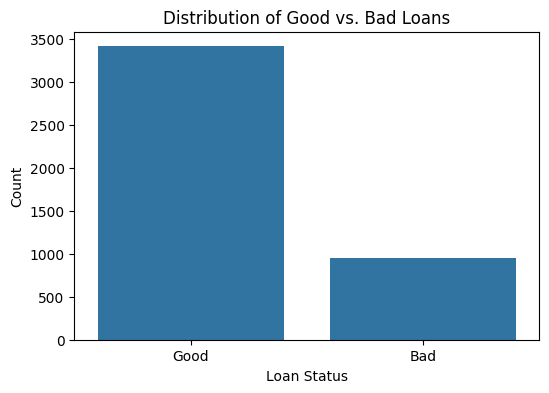

In [219]:
# Check the distribution of the target variable 'good_bad_flag'
display(df_merged['good_bad_flag'].value_counts())

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='good_bad_flag', data=df_merged)
plt.title('Distribution of Good vs. Bad Loans')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

### **EDA: Distributions of Numerical Features**

 Visualizing these distributions helps us understand the range, central tendency, and shape of the data, which can reveal insights and inform feature engineering or scaling steps.

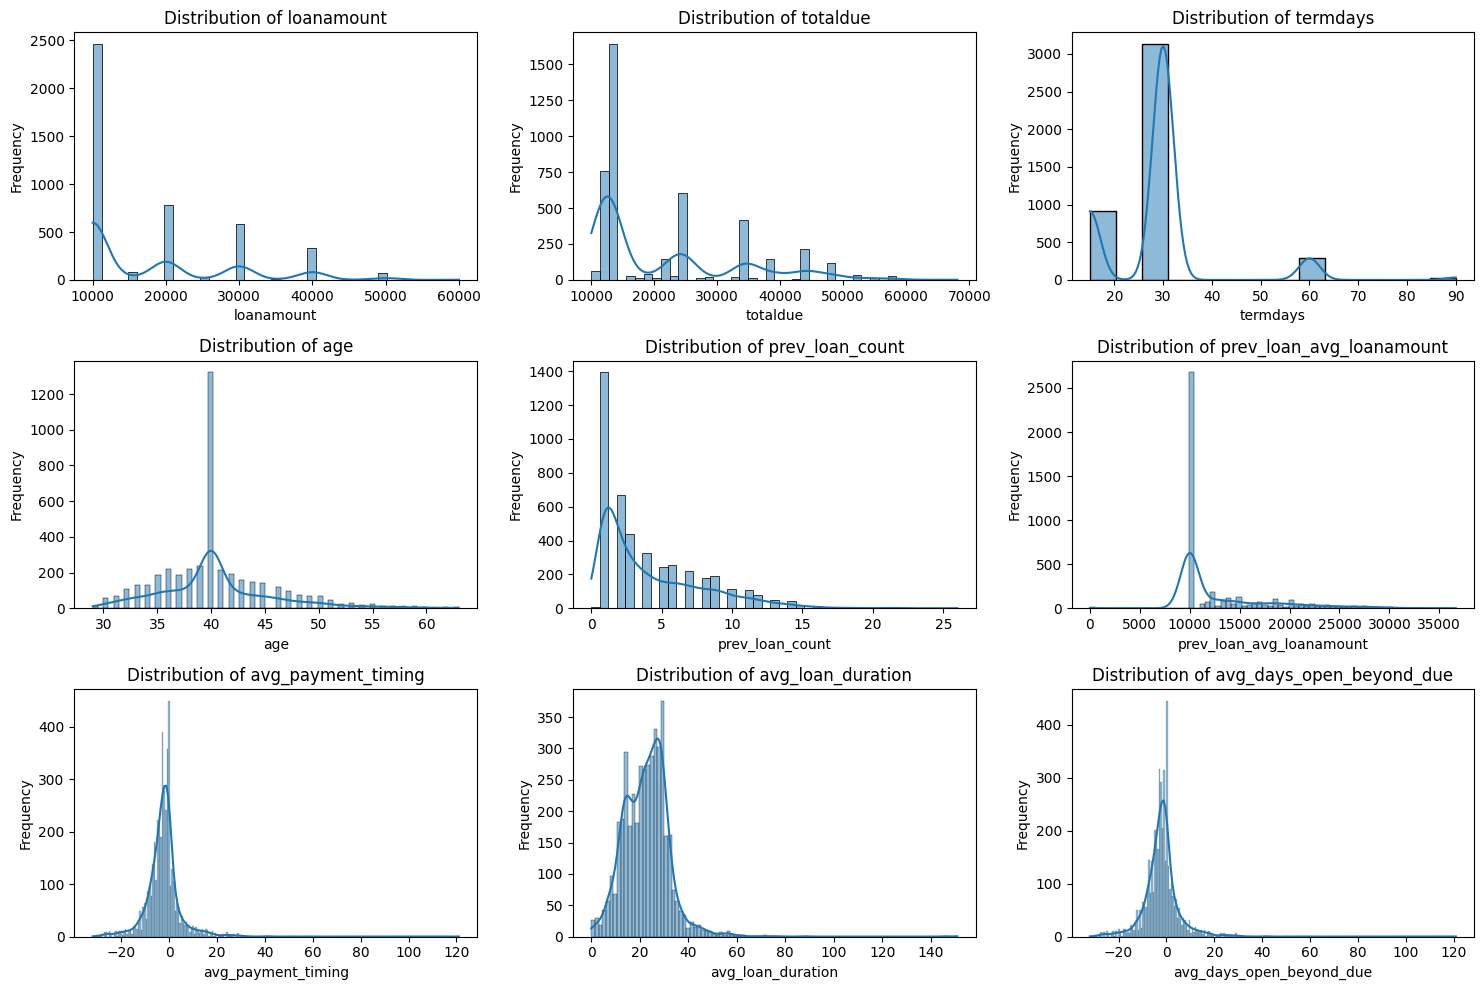

In [220]:
# Select numerical columns for visualization
numerical_cols = ['loanamount', 'totaldue', 'termdays', 'age',
                  'prev_loan_count', 'prev_loan_avg_loanamount',
                  'avg_payment_timing', 'avg_loan_duration', 'avg_days_open_beyond_due']

# Plot histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df_merged, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### **Key Insights from Numerical Features (EDA)**

Analyzing numerical feature distributions reveals significant insights for loan risk prediction and minimizing financial losses:

*   **Loan Amounts & Terms:** Distributions show typical loan sizes (`loanamount`, `totaldue`) and repayment periods (`termdays`). Understanding these norms helps identify deviations that might signal risk (e.g., very large loans, short terms with high total due).
*   **Age:** Standard demographic risk factor; distribution shows typical borrower age range. Risk varies with age group.
*   **Previous Loan Count:** Indicates borrowing frequency. High counts *could* suggest reliance on borrowing, a potential risk factor if combined with poor repayment history.
*   **Previous Loan Performance (`avg_payment_timing`, `avg_loan_duration`, `avg_days_open_beyond_due`):**
    *   **Crucial for Risk:** These features directly reflect past repayment behavior.
    *   **Late Payments/Extended Durations:** Distributions show the extent of delays. Higher values in `avg_payment_timing` (positive), `avg_loan_duration`, and `avg_days_open_beyond_due` are strong indicators of past repayment struggles and predict higher future default risk, directly impacting potential financial losses.

These insights highlight which numerical aspects of a customer's profile and history are most likely to predict default, guiding model development to minimize financial losses.

### EDA: Distributions of Categorical Features

Next, we will visualize the distributions of the categorical features in the `df_merged` DataFrame. This helps us understand the number of unique categories in each feature and the frequency of occurrence for each category.

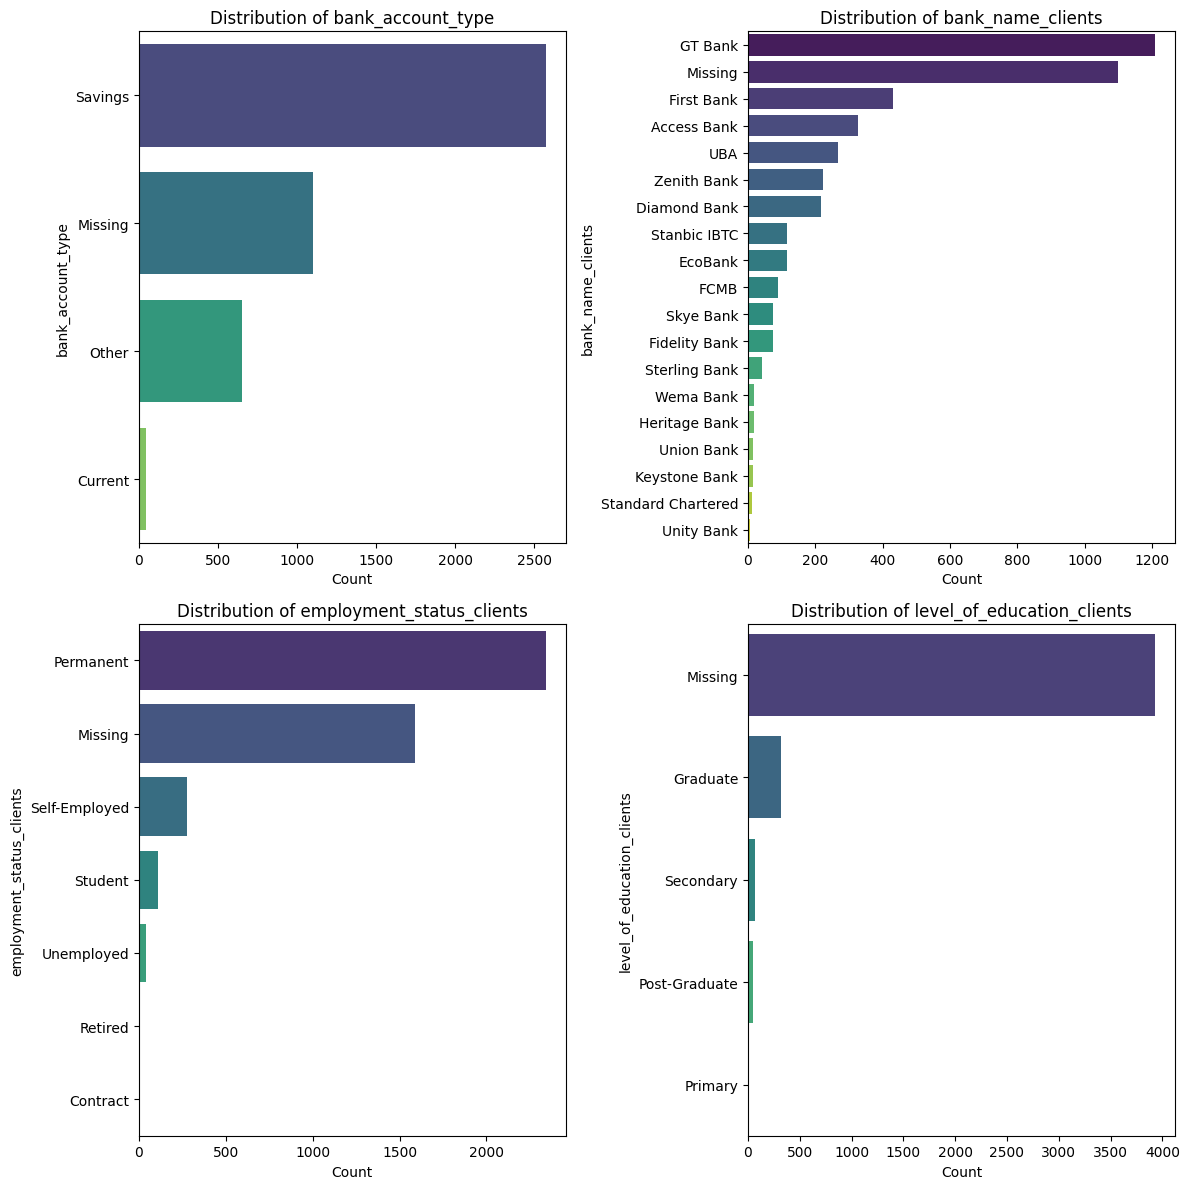

In [221]:
# Select categorical columns for visualization
# Exclude 'customerid' as it's an identifier and 'good_bad_flag' as it's the target
categorical_cols = ['bank_account_type', 'bank_name_clients',
                    'employment_status_clients', 'level_of_education_clients']

# Plot count plots for categorical features
# Determine the number of rows and columns for the subplots dynamically
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(12, n_rows * 6))
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(y=col, data=df_merged, order=df_merged[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Insights from Categorical Feature Distributions (EDA)

Analyzing categorical feature distributions reveals relevant observations and their potential contributions to loan risk modeling:

*   **Bank Account Type:** 'Savings' is the most common account type, followed by a significant 'Missing' category and 'Other'. The prevalence of Savings accounts is a key observation. Differences in default rates across these types could be predictive.
*   **Bank Name:** 'GT Bank' is the most frequent bank among clients, while several banks have very low counts. 'Missing' is also a large category. The distribution highlights key banking relationships, and default rates may vary by bank.
*   **Employment Status:** 'Permanent' employment is the most prominent status, followed by a large 'Missing' category and then 'Self-Employed'. Permanent status suggests stable income (potentially lower risk), while 'Missing' or 'Unemployed' likely indicates higher risk.
*   **Education Level:** The 'Missing' category is the most frequent education level, followed by 'Graduate'. This highlights a data gap but also means 'Missing' is a significant category whose risk profile needs to be assessed. Different education levels can correlate with financial literacy and income.

These features provide demographic and affiliation context. Understanding default rates within each category (including the significant 'Missing' categories) is vital for leveraging their predictive power and informing risk mitigation strategies.

### EDA: Comparing Default Rates Across Categorical Features

To understand which categories within our categorical features are associated with higher or lower loan default risk, we will calculate and visualize the default rate for each category. The default rate is the proportion of 'Bad' loans within that category.

In [222]:
# Convert 'good_bad_flag' to a binary numerical column (1 for 'Bad', 0 for 'Good')
df_merged['good_bad_flag_numeric'] = df_merged['good_bad_flag'].apply(lambda x: 1 if x == 'Bad' else 0)

categorical_cols_for_default_rate = [
    'employment_status_clients',
    'level_of_education_clients',
    'bank_name_clients',
    'bank_account_type'
]

plt.figure(figsize=(12, 10))

for i, col in enumerate(categorical_cols_for_default_rate):
    plt.subplot(2, 2, i + 1)

    # Calculate default rate per category
    default_rate = df_merged.groupby(col)['good_bad_flag_numeric'].mean().sort_values(ascending=False)

    # Plot the default rate
    sns.barplot(x=default_rate.values, y=default_rate.index, palette='viridis')
    plt.title(f'Default Rate by {col}')
    plt.xlabel('Default Rate')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Insights from Default Rate Comparison (EDA)

Comparing default rates across categorical features reveals significant risk indicators:

*   **Employment Status:** 'Student' and 'Missing' statuses show the highest default rates, while 'Retired' and 'Contract' are lowest. 'Permanent' status has a notable default rate. *Hypothesis: Students may have unstable income; missing info often correlates with higher risk.*
*   **Education Level:** 'Secondary' and 'Missing' education levels are associated with higher default rates; 'Primary' and 'Graduate' are lower risk. *Hypothesis: May relate to varying financial literacy or income stability across levels.*
*   **Bank Name & Account Type:** Default rates vary significantly by bank and account type. 'Savings' accounts and certain banks (e.g., Sterling, Skye, EcoBank) show higher risk. The 'Missing' bank name is also a high-risk category. *Hypothesis: Could reflect customer base differences, financial habits, or bank-specific factors.*
*   **Overall 'Missing' Categories:** Across multiple categorical features, the 'Missing' category consistently shows a higher default rate, indicating that the absence of this demographic/affiliation information is a strong predictor of risk. *Hypothesis: Missing data may signal less engagement with formal systems or intentional withholding of information.*

These comparisons highlight specific customer segments and affiliations with elevated default risk, providing crucial insights for targeted risk assessment and mitigation strategies to minimize financial losses.

In [ ]:
# Select only the numerical columns for correlation analysis, including the numerical target variable
numerical_cols = df_merged.select_dtypes(include=np.number).columns
numerical_cols = numerical_cols.drop('systemloanid') # Exclude systemloanid as it's an identifier

# Calculate the correlation matrix
correlation_matrix = df_merged[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(14, 12)) # Increase figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features (including Target)')
plt.show()

In [ ]:
# Select all numerical columns in df_merged
all_numerical_cols = df_merged.select_dtypes(include=np.number).columns

# Exclude identifier columns and the target variable
relevant_numerical_cols = all_numerical_cols.drop(['systemloanid', 'customerid', 'good_bad_flag_numeric'], errors='ignore')

# Display the list of relevant numerical columns
display(list(relevant_numerical_cols))

### EDA: Comparing Default Rates Across Bins of Most Critical Numerical Features

Based on our correlation analysis, the engineered features related to previous loan repayment behavior (`avg_payment_timing`, `avg_days_open_beyond_due`, `avg_loan_duration`) show the strongest linear correlation with default. Let's compare default rates across bins of these critical features to understand risk patterns within their ranges.

In [ ]:
# Define the most critical numerical columns to bin
critical_numerical_cols = [
    'avg_payment_timing',
    'avg_loan_duration',
    'avg_days_open_beyond_due'
]

# Define bins for each critical feature (adjust as needed based on feature distributions)
critical_bins_dict = {
    'avg_payment_timing': [df_merged['avg_payment_timing'].min(), -5, 0, 5, 10, df_merged['avg_payment_timing'].max()],
    'avg_loan_duration': [df_merged['avg_loan_duration'].min(), 15, 30, 45, df_merged['avg_loan_duration'].max()],
    'avg_days_open_beyond_due': [df_merged['avg_days_open_beyond_due'].min(), -5, 0, 5, 10, df_merged['avg_days_open_beyond_due'].max()]
}

# Create bin columns and calculate/plot default rates for critical features
n_cols = 2 # Adjust based on number of features if needed
n_rows = (len(critical_numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(12, n_rows * 5))

for i, col in enumerate(critical_numerical_cols):
    # Create bin column
    bin_col_name = f'{col}_bin'
    df_merged[bin_col_name] = pd.cut(df_merged[col], bins=critical_bins_dict[col], right=True, include_lowest=True)

    plt.subplot(n_rows, n_cols, i + 1)

    # Calculate default rate per bin
    default_rate = df_merged.groupby(bin_col_name)['good_bad_flag_numeric'].mean().sort_values(ascending=False)

    # Plot the default rate per bin
    sns.barplot(x=default_rate.values, y=default_rate.index.astype(str), palette='viridis') # Convert index to string for plotting
    plt.title(f'Default Rate by {col} Bins')
    plt.xlabel('Default Rate')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Drop the bin columns after visualization
critical_bin_columns_to_drop = [f'{col}_bin' for col in critical_numerical_cols]
df_merged.drop(columns=critical_bin_columns_to_drop, inplace=True)

### Insights from Binned Numerical Features (EDA)

Analyzing default rates across bins of critical numerical features provides clear insights into risk patterns:

*   **`avg_payment_timing`:** Default rate significantly increases as average payment timing moves from negative/zero (early/on-time) into positive days (late). Longer delays correlate with much higher risk.
*   **`avg_loan_duration`:** Default rate increases with longer average loan durations. Customers whose previous loans took longer to close are at higher risk.
*   **`avg_days_open_beyond_due`:** Default rate strongly increases as the average number of days a previous loan remained open past the first due date increases. This is a powerful risk indicator.

**Overall Insights:** These binned analyses strongly confirm that **past repayment delays and longer loan durations are critical predictors of future default**. Identifying specific high-risk ranges within these features (e.g., average payment timing > 0 days) is crucial for model building and targeted risk mitigation to minimize financial losses.

### EDA: Detecting Outliers using Boxplots

Identifying outliers in numerical features is an important step in data analysis. Outliers can significantly affect statistical measures and the performance of some machine learning models. Boxplots are a useful visualization tool for detecting potential outliers.

We will create boxplots for our relevant numerical features to visually inspect for outliers.

In [ ]:
# Select the relevant numerical columns (excluding identifiers and target)
numerical_cols_for_outliers = [
    'loannumber',
    'loanamount',
    'totaldue',
    'termdays',
    'prev_loan_count',
    'prev_loan_avg_loanamount',
    'avg_payment_timing',
    'avg_loan_duration',
    'avg_days_open_beyond_due',
    'age',
    'longitude_gps',
    'latitude_gps'
]

# Create boxplots for numerical features
n_cols = 3 # Adjust based on preference for layout
n_rows = (len(numerical_cols_for_outliers) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 5))

for i, col in enumerate(numerical_cols_for_outliers):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df_merged[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Insights from Outlier Detection (EDA)

Analyzing boxplots for numerical features reveals the presence of outliers:

*   **Features with Notable Outliers:** `loannumber`, `loanamount`, `totaldue`, `prev_loan_count`, `prev_loan_avg_loanamount`, `avg_payment_timing`, `avg_loan_duration`, `avg_days_open_beyond_due`, `age`, `longitude_gps`, and `latitude_gps`.
*   **Extent of Outliers:** For some features (e.g., `prev_loan_count`, `avg_payment_timing`, `avg_loan_duration`, `avg_days_open_beyond_due`), the outliers extend quite far from the main body of the data, indicating extreme values.

**Relevance to Modeling:**

*   Outliers can disproportionately influence models sensitive to distance or assumptions of normality.
*   Depending on the chosen model (e.g., linear models, SVMs), handling these outliers (e.g., transformation, capping, removal) might be necessary to improve model performance and stability. Tree-based models are generally less sensitive to outliers.

Identifying these outliers is important for making informed decisions during the data preparation phase about how to treat these extreme values.

**DATA PREPARATION FOR OUR MACHINE MODEL PREDICTION**

### Data Preparation: Encoding Categorical Features

Categorical features need to be converted into a numerical format that machine learning models can understand. We will use One-Hot Encoding for our nominal categorical features to avoid imposing any artificial order.

In [ ]:
# Select the categorical columns to encode (excluding identifiers and target)
categorical_cols_to_encode = [
    'bank_account_type',
    'bank_name_clients',
    'employment_status_clients',
    'level_of_education_clients'
]

# Perform One-Hot Encoding
df_merged_encoded = pd.get_dummies(df_merged, columns=categorical_cols_to_encode, drop_first=True) # drop_first=True to avoid multicollinearity

# Display the first few rows and the shape of the new encoded DataFrame
display(df_merged_encoded.head())
display(df_merged_encoded.shape)
display(df_merged_encoded.info())

In [ ]:
# Display the columns of the encoded DataFrame
display(df_merged_encoded.columns)

## **Categorical Feature Encoding - Key Insights**

*   **Requirement for Models:** Categorical data was converted to numerical format (**One-Hot Encoding**) because most ML models need numerical input.
*   **Accurate Representation:** One-Hot Encoding was chosen to avoid incorrectly implying order for categories like bank names or employment statuses.
*   **Risk Identification:** This encoding allows the model to use information from specific categories (including 'Missing' ones) to predict risk, which is vital for accurate loan default prediction and reducing financial losses.

### Data Preparation: Scaling Numerical Features

Scaling numerical features to a similar range is an important step for many machine learning models, especially those that use distance metrics or are sensitive to the magnitude of feature values (like Logistic Regression, SVMs, K-Nearest Neighbors). We will use `StandardScaler` to scale the numerical features in our dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns in the encoded DataFrame
# Exclude identifier columns, original target, and the numerical target
numerical_cols_to_scale = df_merged_encoded.select_dtypes(include=np.number).columns.tolist()
cols_to_remove = ['customerid', 'systemloanid', 'good_bad_flag_numeric']
numerical_cols_to_scale = [col for col in numerical_cols_to_scale if col not in cols_to_remove]

# Note: Datetime columns are not included in select_dtypes(include=np.number)

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
# We apply fit_transform to the selected columns of the encoded DataFrame
df_merged_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_merged_encoded[numerical_cols_to_scale])

# Display the first few rows of the scaled DataFrame to verify
display(df_merged_encoded.head())

# Display descriptive statistics to see the effect of scaling (mean close to 0, std close to 1)
display(df_merged_encoded[numerical_cols_to_scale].describe().T)

In [ ]:
# Drop the date/time columns as they are not directly used in modeling
columns_to_drop_dates = ['approveddate', 'creationdate', 'birthdate']
df_merged_encoded = df_merged_encoded.drop(columns=columns_to_drop_dates)

# Verify the columns have been dropped by displaying the info
display(df_merged_encoded.info())

In [ ]:
# Drop identifier columns and the original target variable
columns_to_drop_identifiers_target = ['customerid', 'systemloanid', 'good_bad_flag']
df_merged_encoded = df_merged_encoded.drop(columns=columns_to_drop_identifiers_target)

# Verify the columns have been dropped by displaying the info
display(df_merged_encoded.info())

### Data Preparation: Dropping Unnecessary Columns - Key Insights

Several columns were dropped to prepare the data for modeling:

*   **Date/Time Columns (`approveddate`, `creationdate`, `birthdate`):** Dropped because raw dates aren't directly usable by models, and relevant time-based features (like `age`) were already engineered.
*   **Identifier Columns (`customerid`, `systemloanid`):** Dropped as they are unique IDs and not predictive features.
*   **Original Target Variable (`good_bad_flag`):** Dropped because we use the numerical `good_bad_flag_numeric` for modeling.

Dropping these simplifies the dataset and ensures the model focuses on relevant predictive features.

### **Steps on Splitting Data**


1.  **Separate Features and Target:** Isolate the independent variables (features) and the dependent variable (target).
2.  **Perform Train-Test Split:** Divide the dataset into training and testing sets.
3.  **Verify Split Shapes:** Check the number of rows and columns in each resulting set.
4.  **Verify Stratification:** Confirm that the proportion of the target variable's classes is maintained in both the training and testing sets.

### Step 1: Separate Features and Target

We will isolate the independent variables (features), typically denoted as `X`, and the dependent variable (target), typically denoted as `y`. Our target variable is `good_bad_flag_numeric`.

In [232]:
# Separate features (X) and target (y)
X = df_merged_encoded.drop('good_bad_flag_numeric', axis=1)
y = df_merged_encoded['good_bad_flag_numeric']

# Display the shapes to confirm
display("Shape of X:", X.shape)
display("Shape of y:", y.shape)

'Shape of X:'

(4368, 43)

'Shape of y:'

(4368,)

### Step 2: Perform Train-Test Split

We will now divide the features (`X`) and target (`y`) into training and testing sets using `train_test_split`. We will use a test set size of 20% (`test_size=0.2`) and ensure the split is reproducible (`random_state=42`). Crucially, we will use `stratify=y` to maintain the proportion of 'Good' and 'Bad' loans in both the training and testing sets, which is important because our target variable is imbalanced.

In [233]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% train, 20% test)
# Use stratify=y to ensure the same proportion of target classes in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# We will verify the shapes and stratification in the next steps.

### Step 3: Verify Split Shapes

After splitting the data, it's important to verify the shapes of the resulting training and testing sets to ensure the split was performed correctly.

In [234]:
# Display the shapes of the resulting sets
display("Shape of X_train:", X_train.shape)
display("Shape of X_test:", X_test.shape)
display("Shape of y_train:", y_train.shape)
display("Shape of y_test:", y_test.shape)

'Shape of X_train:'

(3494, 43)

'Shape of X_test:'

(874, 43)

'Shape of y_train:'

(3494,)

'Shape of y_test:'

(874,)

### Step 4: Verify Stratification

To confirm that the stratified split successfully maintained the target variable's class distribution, we will check the proportion of 'Good' (0) and 'Bad' (1) loans in both the training and testing sets.

In [235]:
# Display the distribution of the target in train and test sets to verify stratification
display("Distribution of y_train:", y_train.value_counts(normalize=True))
display("Distribution of y_test:", y_test.value_counts(normalize=True))

'Distribution of y_train:'

,proportion
good_bad_flag_numeric,
0,0.781912
1,0.218088


'Distribution of y_test:'

,proportion
good_bad_flag_numeric,
0,0.782609
1,0.217391


## Model Selection and Training

Logistic Regression(baseline)

 The data has been prepared and split into training and testing sets, we can proceed with selecting and training machine learning models to predict loan default risk, starting with Logistic Regression as a baseline model.

In [236]:
# Import necessary libraries for modeling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
# We can adjust parameters later for tuning, but start with default or reasonable values
# Given the imbalanced dataset, consider setting class_weight='balanced'
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced') # 'liblinear' is good for small datasets and handles L2 penalty, class_weight='balanced' helps with imbalance

# Train the model on the training data
log_reg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_log_reg = log_reg_model.predict(X_test)

# We will evaluate the model's performance in the next step.
print("Logistic Regression model trained and predictions made.")

Logistic Regression model trained and predictions made.


## Model Evaluation - Logistic Regression

Now that the Logistic Regression model has been trained, we will evaluate its performance on the testing data using key classification metrics.

In [238]:
# Evaluate the Logistic Regression model
accuracy_log_reg_test = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1]) # Use predict_proba for AUC

# Calculate training accuracy
y_pred_log_reg_train = log_reg_model.predict(X_train)
accuracy_log_reg_train = accuracy_score(y_train, y_pred_log_reg_train)


# Generate Confusion Matrix and Classification Report
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

# Display the evaluation metrics
print("Logistic Regression Model Performance:")
print(f"Training Accuracy: {accuracy_log_reg_train:.4f}")
print(f"Testing Accuracy: {accuracy_log_reg_test:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-Score: {f1_log_reg:.4f}")
print(f"ROC AUC Score: {roc_auc_log_reg:.4f}")

print("\nConfusion Matrix:")
display(conf_matrix_log_reg)

print("\nClassification Report:")
print(class_report_log_reg)

Logistic Regression Model Performance:
Training Accuracy: 0.6465
Testing Accuracy: 0.6648
Precision: 0.3499
Recall: 0.6316
F1-Score: 0.4503
ROC AUC Score: 0.6956

Confusion Matrix:


array([[461, 223],
       [ 70, 120]])


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       684
           1       0.35      0.63      0.45       190

    accuracy                           0.66       874
   macro avg       0.61      0.65      0.60       874
weighted avg       0.76      0.66      0.69       874



### Logistic Regression Baseline Insights

*   **Predictive Ability:** Shows moderate power to distinguish good/bad loans (ROC AUC ~0.70).
*   **Identifying Defaulters (Recall):** Correctly flags ~63% of actual defaulters. Key for minimizing losses.
*   **False Positives (Precision):** ~35% of predicted defaulters are actually good loans. Indicates room for improvement to avoid rejecting good customers.
*   **Baseline Set:** Provides a starting point to measure the performance of subsequent models.

## Model Selection and Training - Random Forest

Following the evaluation of the Logistic Regression baseline, we will now train and evaluate the Random Forest model. Random Forests are ensemble learning methods that can capture complex non-linear relationships and are generally less sensitive to outliers and feature scaling compared to Logistic Regression. They also provide insights into feature importance.

In [239]:
# Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
# Consider parameters like n_estimators, max_depth, and potentially class_weight='balanced' for imbalance
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# We will evaluate the model's performance in the next step.
print("Random Forest model trained and predictions made.")

Random Forest model trained and predictions made.


## Model Evaluation - Random Forest

Now that the Random Forest model has been trained, we will evaluate its performance on the testing data using the same key classification metrics as the baseline model.

In [240]:
# Evaluate the Random Forest model
accuracy_rf_test = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]) # Use predict_proba for AUC

# Calculate training accuracy
y_pred_rf_train = rf_model.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)

# Generate Confusion Matrix and Classification Report
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Display the evaluation metrics
print("Random Forest Model Performance:")
print(f"Training Accuracy: {accuracy_rf_train:.4f}")
print(f"Testing Accuracy: {accuracy_rf_test:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")

print("\nConfusion Matrix:")
display(conf_matrix_rf)

print("\nClassification Report:")
print(class_report_rf)

Random Forest Model Performance:
Training Accuracy: 0.8663
Testing Accuracy: 0.7712
Precision: 0.4702
Recall: 0.4158
F1-Score: 0.4413
ROC AUC Score: 0.7063

Confusion Matrix:


array([[595,  89],
       [111,  79]])


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       684
           1       0.47      0.42      0.44       190

    accuracy                           0.77       874
   macro avg       0.66      0.64      0.65       874
weighted avg       0.76      0.77      0.77       874



### Random Forest Model Insights vs. Baseline

The Random Forest model shows different strengths compared to the Logistic Regression baseline:

*   **Overall Performance (Accuracy & ROC AUC):** Achieves higher overall accuracy (0.77 vs 0.66) and a slightly better ability to distinguish classes (ROC AUC 0.71 vs 0.70).
*   **False Positives (Precision):** Significantly better Precision for the 'Bad' class (0.47 vs 0.35), meaning fewer good customers are incorrectly flagged as high-risk.
*   **Identifying Defaulters (Recall):** Lower Recall for the 'Bad' class (0.42 vs 0.63), meaning it misses more actual defaulters compared to the baseline.
*   **Overfitting:** Shows some signs of overfitting (Training Accuracy 0.87 vs Testing Accuracy 0.77), which might need addressing.

**Insight:** Random Forest offers improved Precision and slightly better overall discrimination but identifies fewer actual defaulters than the Logistic Regression baseline. The choice depends on the business priority (minimizing false positives vs. identifying more defaulters). The overfitting suggests potential for improvement through tuning.

## Model Selection and Training - XGBoost

Following the evaluation of the Logistic Regression and Random Forest models, we will now train the XGBoost model. XGBoost is a powerful gradient boosting algorithm known for its performance. We will use `scale_pos_weight` to handle the class imbalance during training.

In [241]:
# Import XGBoost Classifier
import xgboost as xgb

# Calculate scale_pos_weight for handling imbalance
# scale_pos_weight = count(negative class) / count(positive class)
neg_count = y_train.value_counts()[0] # Assuming 0 is the negative class
pos_count = y_train.value_counts()[1] # Assuming 1 is the positive class
scale_pos_weight_value = neg_count / pos_count

print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.4f}")

# Initialize the XGBoost model
# Use scale_pos_weight to handle imbalance
# Setting use_label_encoder=False to avoid warnings
xgb_model = xgb.XGBClassifier(objective='binary:logistic', # Binary classification
                              eval_metric='logloss',       # Evaluation metric
                              use_label_encoder=False,
                              random_state=42,
                              scale_pos_weight=scale_pos_weight_value)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_xgb = xgb_model.predict(X_test)

# We will evaluate the model's performance in the next step.
print("XGBoost model trained and predictions made.")

Calculated scale_pos_weight: 3.5853
XGBoost model trained and predictions made.


## Model Evaluation - XGBoost

Now that the XGBoost model has been trained, we will evaluate its performance on the testing data using key classification metrics.

In [242]:
# Evaluate the XGBoost model
accuracy_xgb_test = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]) # Use predict_proba for AUC

# Calculate training accuracy
y_pred_xgb_train = xgb_model.predict(X_train)
accuracy_xgb_train = accuracy_score(y_train, y_pred_xgb_train)

# Generate Confusion Matrix and Classification Report
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

# Display the evaluation metrics
print("XGBoost Model Performance:")
print(f"Training Accuracy: {accuracy_xgb_train:.4f}")
print(f"Testing Accuracy: {accuracy_xgb_test:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"ROC AUC Score: {roc_auc_xgb:.4f}")

print("\nConfusion Matrix:")
display(conf_matrix_xgb)

print("\nClassification Report:")
print(class_report_xgb)

XGBoost Model Performance:
Training Accuracy: 0.9516
Testing Accuracy: 0.7471
Precision: 0.4171
Recall: 0.4105
F1-Score: 0.4138
ROC AUC Score: 0.6994

Confusion Matrix:


array([[575, 109],
       [112,  78]])


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       684
           1       0.42      0.41      0.41       190

    accuracy                           0.75       874
   macro avg       0.63      0.63      0.63       874
weighted avg       0.75      0.75      0.75       874

